In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
import random

In [2]:
# creating file paths to csv files
mouse_file = os.path.join('data','Mouse_metadata.csv')
study_file = os.path.join('data','Study_results.csv')
#creating dataframes for each file
mouse_df = pd.read_csv(mouse_file)
study_results_df = pd.read_csv(study_file)
# study_results_df.head()

In [3]:
# mouse_df.head()

In [4]:
# creating (inner) merged data frame using Mouse ID common thing 
mice_study = mouse_df.merge(study_results_df, on='Mouse ID', how='inner')
# mice_study.head()

In [5]:
mice_study['Mouse ID'].nunique()

249

### Cleaning Data

In [6]:
# this was my old way of cleaning up the data (getting rid of that mouse that was doubled)
# it worked but te new way i think works better.

# get mouse id for duplicate time points
# mouse_bool = mice_study[['Mouse ID','Timepoint']].duplicated()
# mouse_bool.head()
# mouse_id = [mice_study['Mouse ID'][cheese] for cheese in range(0,len(mouse_bool)) if (mouse_bool[cheese] == True)]
# mouse_id

#look at that. there are a bunch of repeated values in there.
# mice_study.loc[mice_study['Mouse ID'] == 'g989', :].head()

# dropping dirty mouse
# clean_mice = mice_study.loc[mice_study['Mouse ID'] != 'g989', :]
# clean_mice.head()

# there is one less mouse
# clean_mice.nunique()

# clean_mice.count()

# clean_mice.dtypes

In [7]:
# trying another method because mine is strange (Alyssa K gave me the spring board of a 
# groupby two things on a slack thread)
micems = mice_study.groupby(['Mouse ID','Timepoint'])
meese_id = micems.count().loc[micems['Timepoint'].count() > 1, :]
meese_id
# wow that works alot better

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [8]:
unclean_mouse_id = meese_id.index[0][0]
unclean_mouse_id

'g989'

In [9]:
clean_mice = mice_study.loc[mice_study['Mouse ID'] != unclean_mouse_id, :]
# clean_mice.head()

## Summary Statistics

In [10]:
# clean_mice.head()

In [11]:
# making groupby object on drug regimen
drug_group = clean_mice.groupby('Drug Regimen')
# drug_group

looking at tumor size by drug regimen

In [12]:
# finding mean (Mean Tumor Volum (mm3))
drug_mean = drug_group['Tumor Volume (mm3)'].mean()
# drug_mean.head(3)

In [13]:
# finding median (Median Tumor Volume (mm3))
drug_median = drug_group['Tumor Volume (mm3)'].median()
# drug_median.head(3)

In [14]:
# finding variance (Variance of Tumor Volume (mm6))
drug_var = drug_group['Tumor Volume (mm3)'].var()
# drug_var.head(3)

In [15]:
# finding standard deviation (Std. Dev. of Tumor Volume (mm3))
drug_std = drug_group['Tumor Volume (mm3)'].std()
# drug_std.head(3)

In [16]:
# finding SEM (SEM of Tumor Volume (mm3))
drug_sem = drug_group['Tumor Volume (mm3)'].sem()
# drug_sem.head(3)

In [17]:
# getting index
drug_index = drug_group['Drug Regimen'].unique()
drug_index = pd.Series(drug_index)
drug_index = drug_index.str[0]

In [18]:
# making summary table of statistics
drug_stats_dict = {
    'Mean Tumor Volum (mm3)': drug_mean,
    'Median Tumor Volume (mm3)': drug_median,
    'Variance of Tumor Volume (mm6)': drug_var,
    'Std. Dev. of Tumor Volume (mm3)': drug_std,
    'SEM of Tumor Volume (mm3)': drug_sem
}

# make statistical summary table
drug_stats = pd.DataFrame(drug_stats_dict, index=drug_index)
drug_stats

,Mean Tumor Volum (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm6),Std. Dev. of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


i am interested to see if going back later and only looking at the last time point for each mouse would decrease the the std. deviation and sem, because the drugs are suppose to decrease the size of tumors over time so by looking at whole data set we are introducing a lot of error. and seems just like the wrong way to do it.

### same thing with aggregate functionality

In [19]:
agg_drug_stats = drug_group['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


awesome how it does the same thing. with a few more lines i could even change column titles to make it exactly identical.

# Bars and Pie Charts

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_meas = drug_group['Timepoint'].count()
# num_meas.head(3)

In [21]:
x_axis = np.arange(len(drug_index))
tick_location = [value for value in x_axis]

In [22]:
# this should help with my list object not callable typeerror
drug_array = drug_index.to_numpy()
# drug_array

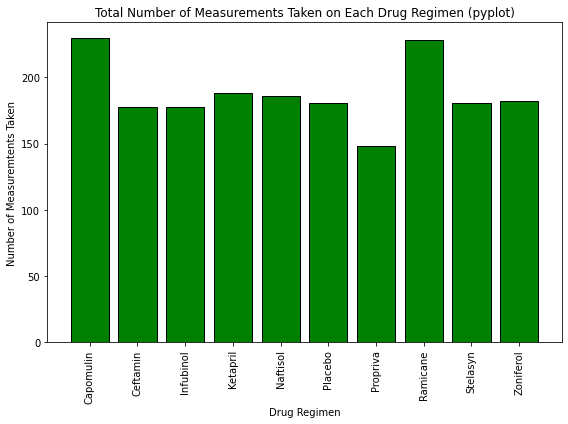

In [23]:
# plotting count of total measurments for each drug regiment using Matplotlib
plt.figure(figsize=(8,6))
plt.bar(x_axis, num_meas, color='g', edgecolor='black')
plt.xticks(tick_location, drug_array, rotation=90)
plt.title('Total Number of Measurements Taken on Each Drug Regimen (pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measuremtents Taken')
plt.tight_layout()
plt.show()

In [24]:
# clean_mice.head()

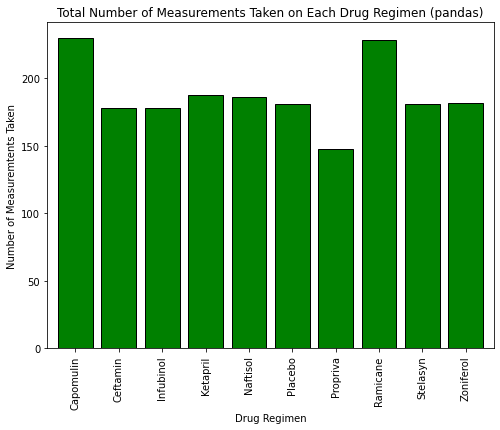

In [25]:
# plotting count of total measurments for each drug regiment using panda
num_meas.plot(kind='bar', figsize=(8,6), color='g', width=.8, edgecolor='black',
              title='Total Number of Measurements Taken on Each Drug Regimen (pandas)')
plt.ylabel('Number of Measuremtents Taken')
plt.show()

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# making series to work on
gender_group = clean_mice.groupby('Sex')
num_gender = gender_group['Sex'].count()
# num_gender

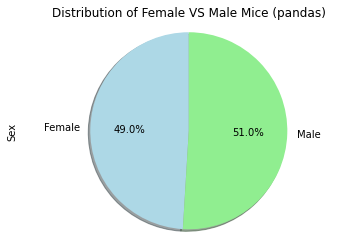

In [27]:
# creating pie chart
color = ['lightblue','lightgreen']
num_gender.plot(kind='pie', y='Sex', title='Distribution of Female VS Male Mice (pandas)', startangle=90,
               autopct='%1.1f%%', shadow=True, colors=color)
plt.axis('equal')
plt.show()

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# making labels
g_labels = gender_group['Sex'].unique()
pd.Series(g_labels)
g_labels = g_labels.str[0]

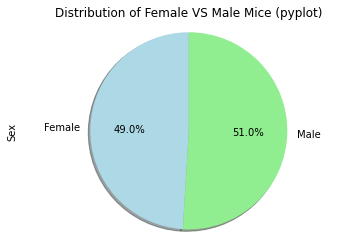

In [29]:
# making plot with pyplot
plt.pie(num_gender, labels=g_labels, shadow=True, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female VS Male Mice (pyplot)')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

# Quartiles, Outliers and Boxplots

In [30]:
# clean_mice.head()

In [31]:
# making list of all drugs i want to include
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# making new df that only includes them
drug_df = clean_mice.loc[(clean_mice['Drug Regimen'] == drugs[0]) | 
                         (clean_mice['Drug Regimen'] == drugs[1]) |
                         (clean_mice['Drug Regimen'] == drugs[2]) | 
                         (clean_mice['Drug Regimen'] == drugs[3]), :]
drug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# now i group by mouse and find greatest timepoint
mousy_group = drug_df.groupby('Mouse ID')
final_tumor = mousy_group['Timepoint'].max()
final_tumor.head()

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [33]:
# just ignore this whole bit

# final_tumor_df = drug_df.loc[([drug_df['Mouse ID'] == i for i in final_tumor.index]) and
#                                ([drug_df['Timepoint'] == x for x in final_tumor]), :] 
# that might be a little to abitiuos (and doesn't work)
# final_tumor_df = drug_df.loc[drug_df['Timepoint'] == 45, :]
# final_tumor_df.head()
# new df that is only those four drugs and final tumor sizes

In [34]:
# merging on both mouse id and timepoint to get only those mice and timepoints
final_tumor_mice = clean_mice.merge(final_tumor, how='inner', on= ['Mouse ID','Timepoint'])
# final_tumor_mice.head()

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
# drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
quartiles = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(drugs)):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # tumor_vol_data is a list of lists of the data corrisonding to each drug
    tumor_this_drug = final_tumor_mice.loc[final_tumor_mice['Drug Regimen'] == drugs[i], 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_this_drug)

    # Determine outliers using upper and lower bounds
    quartiles.append(tumor_vol_data[i].quantile([0.25,0.5,0.75]))
    
    # print drug name and quartiles
    print(drugs[i])
    print(quartiles[i])
    
    lowerq = quartiles[i][0.25]
    upperq = quartiles[i][0.75]
    iqr = upperq-lowerq
    upperb = upperq + (1.5 * iqr)
    lowerb = lowerq - (1.5 * iqr)
   
    # figuring out if there are any outliers in the data.
    outliers = []
    
    for tumor in tumor_vol_data[i]:
        
        if tumor > upperb or tumor < lowerb:
            outliers.append(tumor)
            
    print(f'For {drugs[i]} these are the potential outliers')
    print(outliers)
    
    print(f'IQR for {drugs[i]} is {iqr}')
    print(f'Upper Bound for {drugs[i]} are {upperb}')
    print(f'Lower Bound for {drugs[i]} are {lowerb}')
    print('')

Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
For Capomulin these are the potential outliers
[]
IQR for Capomulin is 7.781863460000004
Upper Bound for Capomulin are 51.83201549
Lower Bound for Capomulin are 20.70456164999999

Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
For Ramicane these are the potential outliers
[]
IQR for Ramicane is 9.098536719999998
Upper Bound for Ramicane are 54.30681135
Lower Bound for Ramicane are 17.912664470000003

Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
For Infubinol these are the potential outliers
[36.321345799999996]
IQR for Infubinol is 11.477135160000003
Upper Bound for Infubinol are 82.74144559000001
Lower Bound for Infubinol are 36.83290494999999

Ceftamin
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin these a

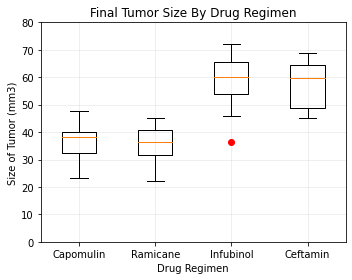

In [36]:
# making a box plot
plt.figure(figsize=(5,4))
plt.boxplot(tumor_vol_data, labels=drugs, sym='ro')

plt.title('Final Tumor Size By Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Size of Tumor (mm3)')

plt.ylim(0,80)
plt.grid(alpha=.25)

plt.tight_layout()
plt.show()

# Line and Scatter Plots

In [37]:
# clean_mice.head()

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# making new df of only Campomulin mice
cap_mice = clean_mice.loc[clean_mice['Drug Regimen'] == 'Capomulin', :]
# cap_mice.head()

In [39]:
random.seed(21) 

In [53]:
# selecting a random mouse
# a_mouse = random.choice(cap_mice['Mouse ID'])
# a_mouse
# I was getting an keyerror when i ran this a third time the way i had it above so i found out
#if i pass it as a list it works
# https://stackoverflow.com/questions/45317725/python-3-5-3-keyerror-0-returned-from-random-choice

a_mouse = random.choice(list(cap_mice['Mouse ID']))

# i like doing it this way because i can get a random mouse (and if i restart my kernel the same random mouse)
# but if i want to i can by pass all that and just select the mouse i want and set a_mouse to be what i want.

# a_mouse = g288

In [54]:
# cutting down the datafrome to be only that mouse
that_mouse = cap_mice.loc[cap_mice['Mouse ID'] == a_mouse, :]
that_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1
244,g288,Capomulin,Male,3,19,45,37.074024,1


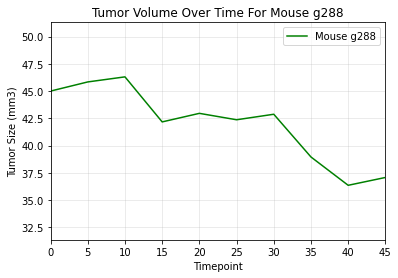

In [55]:
# let us plot that mouse (originally looked at t565)
that_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', color='green')

plt.grid(alpha=.3)

plt.title(f'Tumor Volume Over Time For Mouse {a_mouse}')
plt.ylabel('Tumor Size (mm3)')
plt.legend(loc='best', labels=[f'Mouse {a_mouse}'])

plt.xlim(0,max(that_mouse['Timepoint']))
plt.ylim(min(that_mouse['Tumor Volume (mm3)']) - 5, max(that_mouse['Tumor Volume (mm3)']) + 5)

plt.show()

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# cap_mice.head()

In [44]:
# i am going to group by mouse that take average of both tumor volume and weight and plot them
cap_by_mouse = cap_mice.groupby('Mouse ID')

avg_tumor = cap_by_mouse['Tumor Volume (mm3)'].mean()

# i am taking the average but since they are static i is really just grabbing the number for me
weight = cap_by_mouse['Weight (g)'].mean()

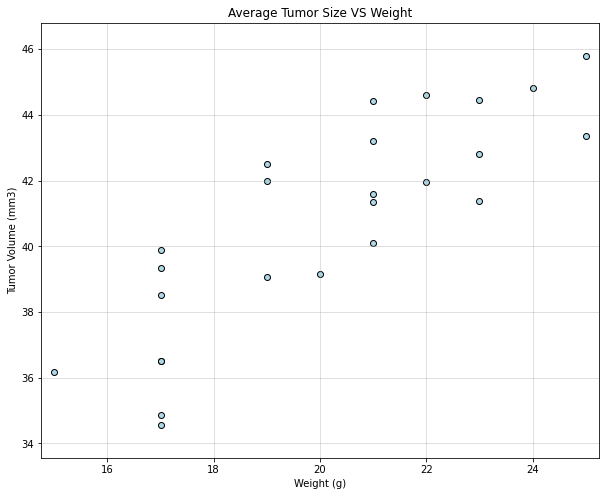

In [45]:
# plotting
plt.figure(figsize=(10,8))
plt.scatter(weight, avg_tumor, color='lightblue', edgecolor='black')

plt.grid(alpha=.5)

plt.title('Average Tumor Size VS Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(min(weight)-0.25,max(weight)+0.25)
plt.ylim(min(avg_tumor)-1,max(avg_tumor)+1)

plt.show()

# Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,avg_tumor)
print(f'The correlation between a mice weight and tumor size is {correlation[0]}.')


The correlation between a mice weight and tumor size is 0.8419363424694717.


The r value is 0.7088568047708717


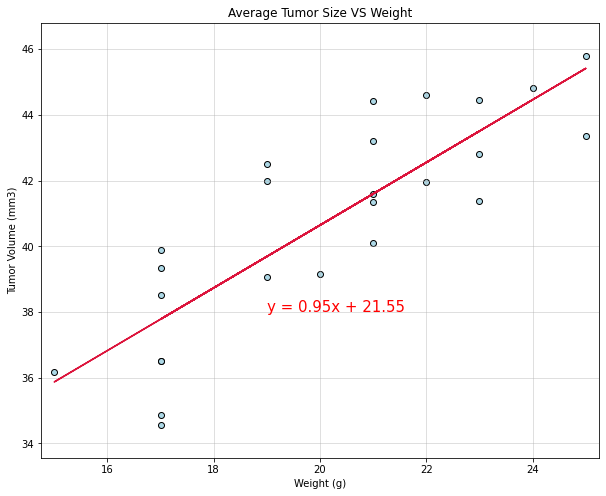

In [56]:
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_line = slope * weight + intercept

print(f'The r value is {rvalue**2}')
# plotting again, same but with linear regression line
plt.figure(figsize=(10,8))
plt.scatter(weight, avg_tumor, color='lightblue', edgecolor='black')
plt.plot(weight, regress_line, color='crimson')

plt.grid(alpha=.5)

written_regress = f'y = {slope:.2f}x + {intercept:.2f}'
# print(written_regress)
plt.annotate(written_regress, (19,38), fontsize=15, color='r')

plt.title('Average Tumor Size VS Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(min(weight)-0.25,max(weight)+0.25)
plt.ylim(min(avg_tumor)-1,max(avg_tumor)+1)

plt.show()

# My Observations

## Capomulin Seems Effective
After looking at a few mice from the capomulin remimen, I noticed that the tumors decrease in size steadily over time. Which would indicate that perhaps the drug is working. Obviously looking at a couple of graphs of a couple of mice is not enough to say definatifly that this drug is effective but it could be.

## There is a Strong Correlation Between Tumor size and Weight of Mice
Bigger mice have bigger tumors. Makes sense. And this correlatoin coefficent backs up that assumption. This one just matches what we experience in our world everyday, bigger things mean bigger other things. It would feel weird if somehow the smaller mice had bigger tumors. But i guess there could have been no correlation and tumor size could have had nothing to do with size of mouse.

## Lowest Median
The two regimens with the highest number of measurments taken where capomulin and ramicane. They were included in our boxplot of the four most effective regimens and of those four and the noticably lower medians and the smaller iqrs. I just found it interesting that the most effective drugs regimens were also the most thouroghly tested.